In [10]:
from matplotlib import pyplot as plt
import numpy as np
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import cv2 as cv

In [11]:
print('Reading train dataset (Train 60000.cdb)...')
X_train, Y_train = read_hoda_dataset(dataset_path='./DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
# np.random.seed(12)
randomTrainingPermutationArray = np.random.permutation(len(X_train))
X_train = X_train[randomTrainingPermutationArray]
Y_train = Y_train[randomTrainingPermutationArray]
X_CV = X_train[5000:10000]
Y_CV = Y_train[5000:10000]
X_train = X_train[:5000]
Y_train = Y_train[:5000]

Reading train dataset (Train 60000.cdb)...


In [12]:
print('Reading test dataset (Test 20000.cdb)...')
X_test, Y_test = read_hoda_dataset(dataset_path='./DigitDB/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

Reading test dataset (Test 20000.cdb)...


In [13]:
randomTestingPermutationArray = np.random.permutation(len(X_test))
X_test = X_test[randomTestingPermutationArray]
Y_test = Y_test[randomTestingPermutationArray]
X_test = X_test[:5000]
Y_test = Y_test[:5000]
##############################################################################################3

In [14]:
### hyperparameter tuning checking k from 1 to 20
print("hyperparameter tuning checking k from 1 to 20 ...")

hyperparameter tuning checking k from 1 to 20 ...


In [15]:
KAccuracyPairsList = []
for k in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train, Y_train)
    Y_predict = classifier.predict(X_CV)
    acc = accuracy_score(Y_CV, Y_predict)
    KAccuracyPairsList.append((k,acc))
print(KAccuracyPairsList)
maxPair = max(KAccuracyPairsList,key=lambda item:item[1])
bestK = maxPair[0]
print("the best K is", bestK)

[(1, 0.9572), (2, 0.9426), (3, 0.9538), (4, 0.951), (5, 0.9532), (6, 0.9502), (7, 0.9494), (8, 0.947), (9, 0.9444), (10, 0.944), (11, 0.9434), (12, 0.942), (13, 0.9422), (14, 0.9406), (15, 0.939), (16, 0.939), (17, 0.939), (18, 0.9382), (19, 0.9366)]
the best K is 1


In [16]:
print("Model Training started ...")
classifier= KNeighborsClassifier(n_neighbors=bestK, metric='euclidean')
classifier.fit(X_train, Y_train)
Y_predict = classifier.predict(X_test)

Model Training started ...


confusion matrix : 
[[504   0   0   0   0   2   0   0   0   0]
 [  1 529   0   0   0   0   0   1   0   0]
 [  2  40 447  16   3   0   1   0   0   1]
 [  2   1  72 370  18   0   1   5   4   0]
 [  8   9  25  25 409   1   7   0   0   0]
 [  7  10   1   0   1 446   1   0  38   1]
 [  4   3   4   0   0   2 492   3   1  20]
 [  5   7   5   2   1   0   5 474   0   0]
 [  3   7   0   0   0   1   0   0 491   4]
 [  0  27   2   0   0   1  10   0   2 415]]
accuracy :  0.9154


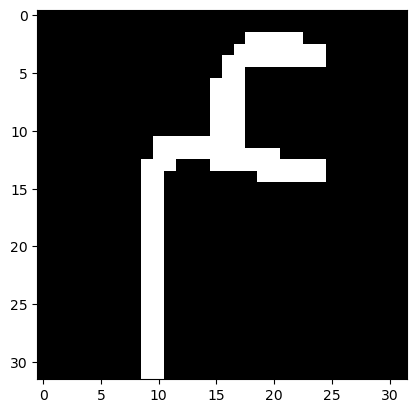

In [17]:
# Creating the Confusion matrix
cm = confusion_matrix(Y_test, Y_predict)
print("confusion matrix : ")
print(cm)
acc = accuracy_score(Y_test, Y_predict)
print("accuracy : ",acc)
#
#
# importing, resizing and masking image
image = cv.imread("./4.3.png",cv.IMREAD_GRAYSCALE)
resizedImage = cv.resize(image, dsize=(32, 32), interpolation=cv.INTER_CUBIC)
# making those pixels that are bigger than 0 equal to 1 so that the image is sharper
resizedImage[resizedImage>0]= 1
# showing the image
plt.imshow(resizedImage, cmap='gray')
plt.show()

In [18]:
# predicting the label for our image
Y_predict = classifier.predict([resizedImage.ravel()])[0]
print("predicted result : ", Y_predict)

predicted result :  4.0
